# **사전준비 for windows**
window 기본 폰트인 맑은고딕으로 설정한다. 
window에 설치된 jupyter notebook kernel에서 실행할 때 사용한다.
(colab으로 진행할 경우에는 '사전준비 for colab' 만 실행하면 된다

In [ ]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 


In [ ]:
# 폰트의 경로를 통해 사용할 폰트 (맑은고딕)를 지정한다.

path = r'C:\Windows\Fonts\malgun.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
mpl.rc('font', family=font_name)    # 맑은고딕으로 설정
mpl.rcParams['axes.unicode_minus'] = False  # - 부호 오류 보정

Malgun Gothic


# **사전준비 for colab**
matplotlib 그래프 내 한글 글꼴 표시를 위한 설치 및 런타임 다시 시작과 폰트 설정 작업을 단계별로 수행한다.

## [1] 폰트 설치 (나눔글꼴) 및 폰트매니저 재구성

In [13]:
####  없어도 됨 [폰트개수 확인용]
# 시스템내 최초 설치된 폰트개수 확인 - 처음에는 기본 폰트만 설치됨

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 17
nanum_font number: 0


In [14]:
# 나눔고디 폰트 설치

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [15]:
####  없어도 됨 [폰트개수 확인용]
# 설치 후  폰트 개수 확인,  늘어 난 것을 알 수 있다.

import matplotlib.font_manager as fm  # 폰트 관련 용도
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [16]:
# 폰트 매니저 재설정을 위한 명령문 수행 : fm._rebuild()
import matplotlib.font_manager as fm
fm._rebuild()

## [2] 폰트 인식을 위한  '런타임 다시시작'
  - '런타임' - '런타임 다시 시작' 
  - 또는 'Ctrl-M'


## [3] 런타임 재시작 이후 
   - 폰트  설정 및 마이너스 부호 오류 처리
   - **시작 이후에는 본 셀 이후 부터 실행한다.**

In [4]:
# 관련 라이브러리 임포트
import matplotlib.font_manager as fm  # 폰트 관련 
import matplotlib.pyplot as plt   # 그래프 내 설정
import matplotlib as mpl  # 기본 설정 


In [5]:
####  없어도 됨 [폰트개수 확인용]
# 런타임 다시 시작 이후, 설치 된 폰트 개수가 증가 한 상태임을 알 수 있다. 
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
nanum_font number: 31


In [6]:
# 폰트의 경로를 통해 사용할 폰트 (나눔고딕)를 지정한다.
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 사용할 폰트의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# 마이너스 부호 처리에 오류가 있는 경우를 방지 하기 위한 설정
mpl.rcParams['axes.unicode_minus'] = False  

NanumGothic


# **지하철 탑승객 분석**
- 파일 읽기
- 데이터 보이기
- 노선별 집계 및 그래프
- 사용일자 별 집계 및 그래프

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 파일 읽고 데이터 보이기

In [13]:
# 데이터를 읽어 들여서 출력해 봅니다.
subway = pd.read_csv('https://github.com/sagelab4data/HyundaiHigh_1/blob/main/CARD_SUBWAY_MONTH_202009.csv?raw=true',
                     encoding = 'euc-kr',
                    parse_dates=['사용일자','등록일자'])
subway

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2020-09-01,일산선,주엽,6123,6290,2020-09-04
1,2020-09-01,일산선,대화,10034,7923,2020-09-04
2,2020-09-01,장항선,봉명,802,794,2020-09-04
3,2020-09-01,장항선,쌍용(나사렛대),1335,1189,2020-09-04
4,2020-09-01,중앙선,아신,382,387,2020-09-04
...,...,...,...,...,...,...
17877,2020-09-30,2호선,건대입구,17739,18062,2020-10-03
17878,2020-09-30,2호선,성수,6972,7561,2020-10-03
17879,2020-09-30,2호선,뚝섬,5557,5493,2020-10-03
17880,2020-09-30,2호선,한양대,1870,1505,2020-10-03


## 노선별 집계 및 그래프

In [9]:
# 노선별 집계하고 그래프를 그려봅니다. 

subway.groupby('노선명')[['승차총승객수','하차총승객수']].sum()

,승차총승객수,하차총승객수
노선명,,
1호선,4819390,4761911
2호선,28447508,28755355
3호선,10744138,10777244
4호선,10386783,10418820
5호선,12861988,12745685
6호선,7016018,6874046
7호선,15098460,14873687
8호선,4025170,4033883
9호선,5525709,5598307


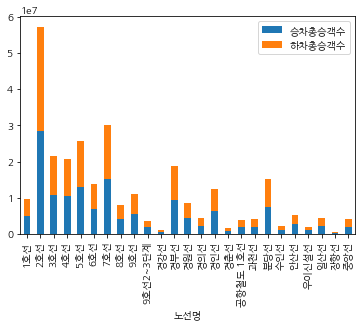

In [17]:
subway.groupby('노선명')[['승차총승객수','하차총승객수']].sum().plot(kind = 'bar', stacked = True);

## 사용일자별 집계 및 그래프

In [14]:
# 사용일자별 탑승자수 집계 및 그래프 
subway.groupby('사용일자')[['승차총승객수','하차총승객수']].sum()

,승차총승객수,하차총승객수
사용일자,,
2020-09-01,4948942,4934954
2020-09-02,4757519,4743981
2020-09-03,4735517,4723205
2020-09-04,5244125,5229572
2020-09-05,2991611,2979258
2020-09-06,1999466,1989370
2020-09-07,4726687,4714535
2020-09-08,5271254,5256299
2020-09-09,5176649,5162097


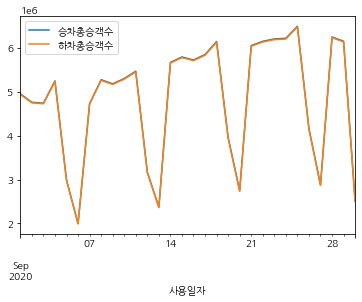

In [16]:
subway.groupby('사용일자')[['승차총승객수','하차총승객수']].sum().plot(kind = 'line');